You are tasked with predicting the survival or passangers on the titanic based on various features such as age,sex,class,etc.Using the titanic dataset you will implement logistic regression to create a predictive model and evaluate its performance

Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#DataSet collection

In [139]:
titanic_df = pd.read_csv('/content/train.csv')

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<br>**Survival**: Indicates whether the passenger survived (0 = No, 1 = Yes)
<br>**Pclass**: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
<br>**Sex**: Gender of the passenger
<br>**Age**: Age of the passenger in years
<br>**SibSp**: Number of siblings or spouses aboard the Titanic
<br>**Parch**: Number of parents or children aboard the Titanic
<br>**Ticket**: Ticket number
<br>**Fare**: Passenger fare
<br>**Cabin**: Cabin number
<br>**Embarked**: Port of Embarkation:in which port the passanger has boarded the ship.C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
titanic_df.shape

(891, 12)

891 passangers

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#Exploratory Data Analysis

In [ ]:
titanic_df[['Age', 'Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [ ]:
titanic_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

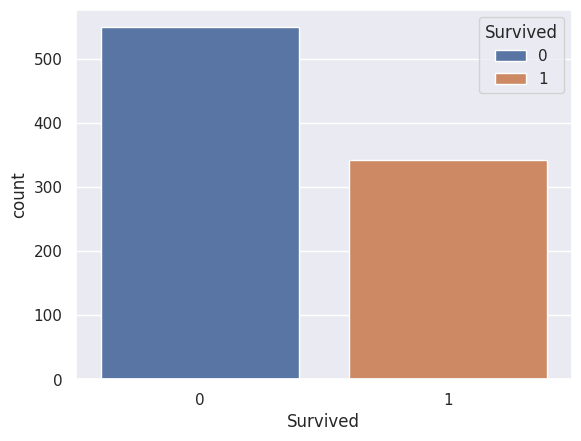

In [ ]:
#making a count plot for survived column
sns.countplot(x='Survived', data=titanic_df,hue='Survived')

<Axes: xlabel='Sex', ylabel='count'>

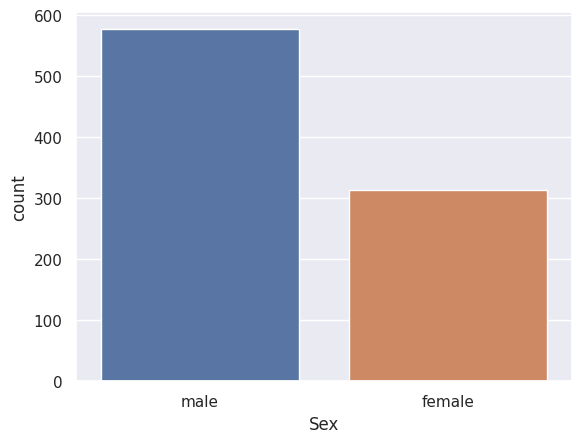

In [ ]:
sns.countplot(x='Sex',data=titanic_df,hue='Sex')

<Axes: xlabel='Sex', ylabel='count'>

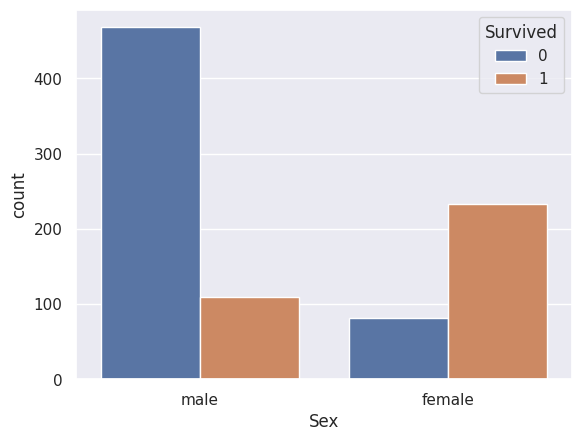

In [ ]:
#No of survivors gendervise
sns.countplot(x='Sex',data=titanic_df,hue='Survived')

females are given more priority to be saved

<Axes: xlabel='Pclass', ylabel='count'>

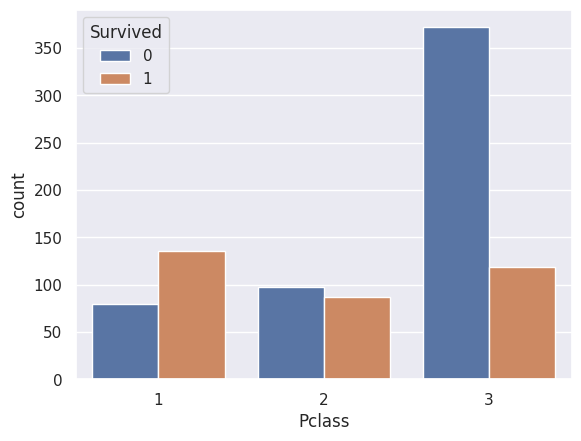

In [ ]:
sns.countplot(x='Pclass',data=titanic_df,hue='Survived')

more no of people frm first class survived as compared to other classes

#Data Preprocessing

In [ ]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

there are missing values in age and cabin column and only 2 values missing in Embarked

Handling the missing values

In [ ]:
#im cabin as majority of values are missing so we need to drop it from the dataframe
titanic_df = titanic_df.drop(columns = 'Cabin',axis=1)

In [ ]:
#Replacing the missing values in age column with mean value of that column
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

In [ ]:
#for Embarked colmn we will replace the missing values with the mode values. i.e the value that is repeated most number of time
print(titanic_df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


it has index 0

value S is repeated most number of time

In [ ]:
#replacing the missing vlaues in embarked column with mode vlaue
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0],inplace = True)

In [ ]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Converting Categoral values into numerical forms

In [ ]:
#We do not need the name column
titanic_df = titanic_df.drop(columns = 'Name',axis=1)

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [ ]:
titanic_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

As there are only two values in sex therefore we can replace them with 0 and 1

male-0

female-1

In [ ]:
titanic_df.replace({'Sex':{'male':0 ,'female':1}},inplace=True)

In [ ]:
titanic_df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

S-0

C-1

Q-2

In [ ]:
titanic_df.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,1,35.0,1,0,113803,53.1000,0
4,5,0,3,0,35.0,0,0,373450,8.0500,0


In [ ]:
titanic_df = titanic_df.drop(columns =['PassengerId','Ticket'],axis=1 )

In [ ]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


Understanding the correlation between target variable and features

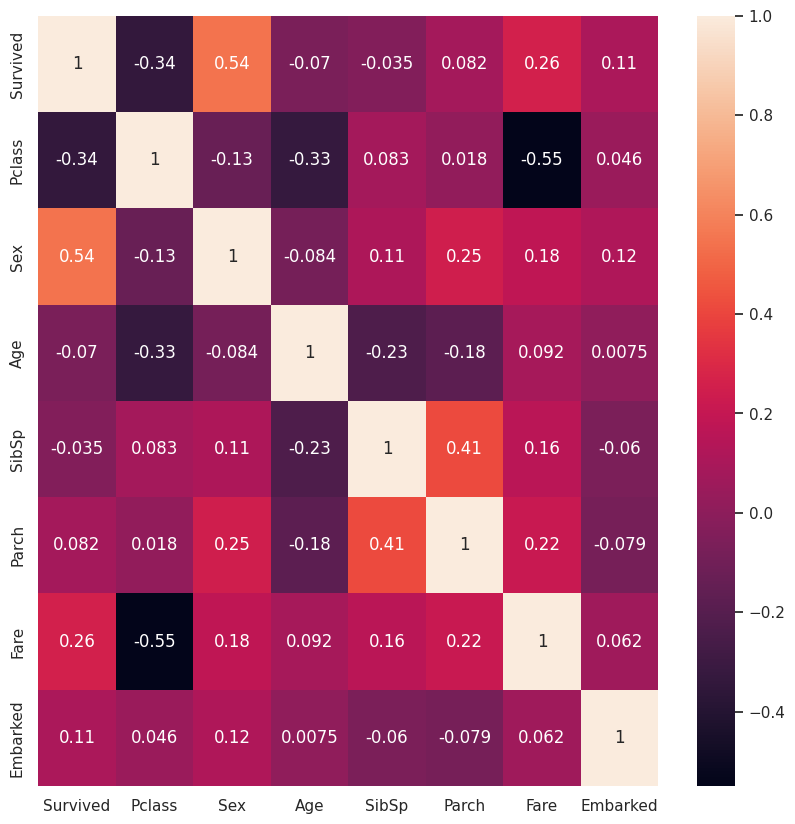

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(titanic_df.corr(),annot=True)
plt.show()

#Define Feature And Target Variable

In [ ]:
x = titanic_df.drop(columns = ['Survived'],axis=1)
y = titanic_df['Survived']

In [ ]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
features_to_scale = ['Age', 'Fare']

In [ ]:
x[features_to_scale] = scaler.fit_transform(x[features_to_scale])

In [ ]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,-0.592481,1,0,-0.502445,0
1,1,1,0.638789,1,0,0.786845,1
2,3,1,-0.284663,0,0,-0.488854,0
3,1,1,0.407926,1,0,0.420730,0
4,3,0,0.407926,0,0,-0.486337,0
...,...,...,...,...,...,...,...
886,2,0,-0.207709,0,0,-0.386671,0
887,1,1,-0.823344,0,0,-0.044381,0
888,3,1,0.000000,1,2,-0.176263,0
889,1,0,-0.284663,0,0,-0.044381,1


#Splitting the data

splitting the data using train test split into 80:20 ratio

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(891, 7) (712, 7) (179, 7)


#Building and training Model

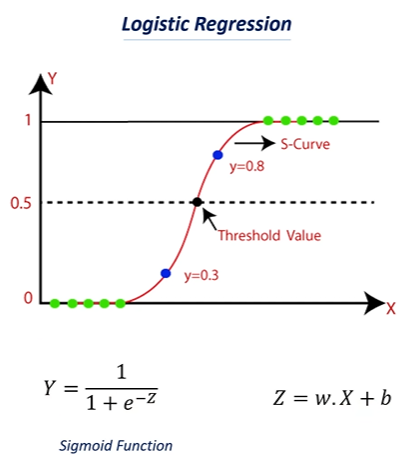

X = input features

w = eights

b = bias

Y = Prediction probability.it will lie between 0 and 1

when we give the data to the logistic regression model it builds a sigmoid function and then finds a threshold value.

then for new input values if the y value is greater thean 0.5 then it would be considered as 1 i.e in our case survived else 0 i.e in our case not survived. therefor elogistic regression is a great model for binary classification

In [ ]:
model = LogisticRegression() #loading the instance of model

In [ ]:
#Training the model on training data

model.fit(x_train,y_train)

LogisticRegression()

#Evaluating the model

In [ ]:
#Accuracy on training data
x_train_prediction = model.predict(x_train)

In [ ]:
training_data_accuracy = accuracy_score(y_train,x_train_prediction)

In [ ]:
print(training_data_accuracy)

0.8103932584269663


Accuracy Score on training data is 81%

In [ ]:
#Accuracy score on test data
x_test_prediction = model.predict(x_test)

In [ ]:
test_data_accuracy = accuracy_score(y_test,x_test_prediction)

In [ ]:
print(test_data_accuracy)

0.7821229050279329


we got a 78.21% accuracy on test data

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, x_test_prediction))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.62      0.72        79

    accuracy                           0.78       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



In [ ]:
cm = confusion_matrix(y_test,x_test_prediction)

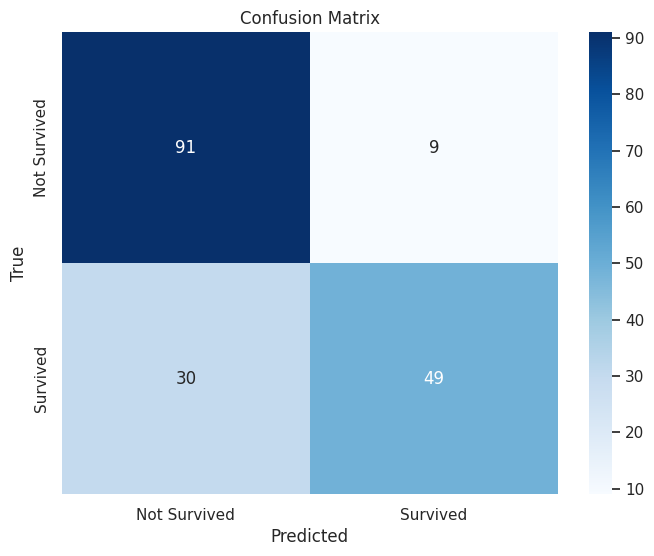

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("Precision: ", precision_score(y_test, x_test_prediction))
print("Recall: ", recall_score(y_test, x_test_prediction))
print("F1 Score: ", f1_score(y_test, x_test_prediction))

Precision:  0.8448275862068966
Recall:  0.620253164556962
F1 Score:  0.7153284671532847


In [ ]:
coefficients = model.coef_[0]
feature_names = x.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)

    Feature  Coefficient
1       Sex     2.671766
6  Embarked     0.219438
5      Fare     0.126968
4     Parch    -0.020932
3     SibSp    -0.394195
2       Age    -0.580538
0    Pclass    -1.098430


Positive Coefficients: Features with positive values increase the probability of survival.

Negative Coefficients: Features with negative values decrease the probability of survival.

Magnitude: The absolute value of the coefficients indicates the strength of the feature's influence

**Summary of the models performance**

1.*Accuracy:*

1.   Training Accuracy (81%): Indicates that the model performs well on the training data.
2.   Testing Accuracy (78.21%): Slightly lower accuracy on the testing set may indicate some overfitting, where the model performs well on training data but less so on unseen data.

2.*Precision (0.845):*
High precision indicates that when the model predicts survival, it is correct about 84.5% of the time. This suggests the model is good at minimizing false positives.

3.*Recall (0.620):*
Lower recall suggests that the model correctly identifies 62% of actual survivors. This means there are a considerable number of false negatives (missed survivors).

4.*F1 Score (0.715):*
The F1 Score balances precision and recall. A score of 0.715 indicates a reasonable balance but leaves room for improvement

**Potential Improvementstext**

1. trying different models or ensemble techniqyes
2. Using cross validation for getting better estimation of the models performance
3. hyperparamater tuninning: Using grid search cv or random search cv for finding better hyper paramaters for the model

performing cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000),x,y,cv=5) #cv=no of folds i.e different cunks of data.it automatically uses stratifiedKfolds when we use integer value for cv

In [ ]:
print(cv_score_lr)

[0.79329609 0.78651685 0.79213483 0.76966292 0.8258427 ]


for each iteration we got a accuracy value

In [ ]:
mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)
mean_accuracy_lr = mean_accuracy_lr*100
mean_accuracy_lr = round(mean_accuracy_lr,2)
print(mean_accuracy_lr)

79.35


with the cross validation the accuracy came out to be 79.35%